In [1]:
import cv2, collections
import numpy as np
import matplotlib.pyplot as plt
import math
from queue import Queue

In [2]:
def centroid_bfs(img,r,c,col,vis):
    h,w = img.shape
    q = Queue()
    q.put((r,c))
    vis[r,c] = 1
    cent_x = 0
    cent_y = 0
    cnt = 0
    min_x = h+1
    min_y = w+1
    max_x = 0
    max_y = 0
    while not q.empty():
        r, c = q.get()
        min_x = min(min_x,r)
        min_y = min(min_y,c)
        max_x = max(max_x,r)
        max_y = max(max_y,c)
        cnt += 1
        cent_x += r
        cent_y += c
        if r-1>=0 and vis[r-1,c] == 0 and img[r-1,c]!=0:
            vis[r-1,c] = col
            q.put((r-1,c))
        if r+1<h and vis[r+1,c] == 0 and img[r+1,c]!=0:
            vis[r+1,c] = 1
            q.put((r+1,c))
        if c-1>=0 and vis[r,c-1] == 0 and img[r,c-1]!=0:
            vis[r,c-1] = 1
            q.put((r,c-1))
        if c+1<w and vis[r,c+1] == 0 and img[r,c+1]!=0:
            vis[r,c+1] = 1
            q.put((r,c+1))
            
    cent_x = cent_x//cnt
    cent_y = cent_y//cnt
    
    # bounding box co-ordinates are pushed in an array
    arr = [(min_x,min_y),(min_x,max_y),(max_x,min_y),(max_x,max_y)]
    
    return cent_x, cent_y, arr

In [20]:
def centroid_plotting(bw_img_path,col_img_path):
    img = cv2.imread(bw_img_path,0)

    # taking OSTU's threshold for best results
    th, thresh1 = cv2.threshold(img, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
    img = (img > th).astype(np.uint8)

    cent = []
    vis = np.zeros(img.shape)
    h, w= img.shape
    for i in range(h):
        for j in range(w):
            if img[i,j]==1 and vis[i,j]==0:
                # the cent_x and cent_y has x,y coordi of centroid and the array arr has the bounding box coordi                 
                cent_x, cent_y, arr = centroid_bfs(img,i,j,1,vis)
                cent.append((cent_x,cent_y,arr))
        
#     for i in range(len(cent)):
#         print(cent[i][0],cent[i][1])
        
    img = cv2.imread(col_img_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    
    for p in range(len(cent)):
        for i in range(-2,3):
            for j in range(-2,3):
                if cent[p][0]+i>=0 and cent[p][0]+i<h and cent[p][1]+j>=0 and cent[p][1]+j<w:
                    img[cent[p][0]+i,cent[p][1]+j,0] = 255
                    img[cent[p][0]+i,cent[p][1]+j,1] = 255
                    img[cent[p][0]+i,cent[p][1]+j,2] = 255

    return img, cent
    

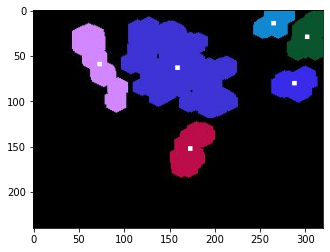

In [22]:
img, cent = centroid_plotting('../images/joined_bl/frame5.jpg','../images/joined/frame5.jpg')
plt.imshow(img)
plt.show()

# # printing bounding box co-ordinates
# for i in range(len(cent)):
#     for j in range(len(cent[i][2])):
#         print(cent[i][2][j])
        
#     print('----------')